In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('flight_delays.csv')

In [4]:
data.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y


In [4]:
data.shape

(100000, 9)

### Доля задержанных рейсов ###

In [16]:
(data.Month[data.dep_delayed_15min == 'Y'].count())/len(data)

0.19044

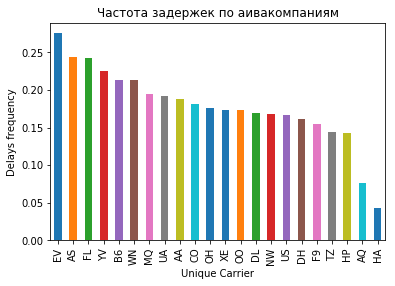

In [35]:

data.groupby("UniqueCarrier").apply(lambda data: np.sum(data["dep_delayed_15min"] == "Y")/len(data)).sort_values(ascending=False).plot(kind="bar");
plt.xlabel("Unique Carrier")
plt.ylabel("Delays frequency")
plt.title('Частота задержек по аивакомпаниям')
plt.show()

### Зависимость количества задержек от увеличивающейся дистанции полета ###

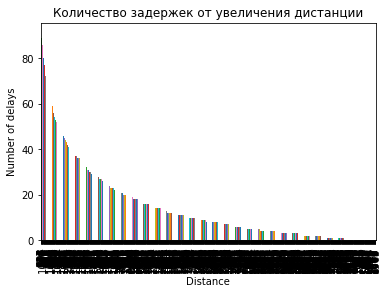

In [125]:
data.groupby("Distance").apply(lambda data: np.sum(data["dep_delayed_15min"] == "Y")).sort_values(ascending=False).plot(kind = 'bar')
plt.xlabel("Distance")
plt.ylabel("Number of delays")
plt.title('Количество задержек от увеличения дистанции')
plt.show()

### Топ 5 направлений, в котрых чаще всего происходили задержки ###

In [26]:
data.groupby("Dest").apply(lambda data: np.sum(data["dep_delayed_15min"] == "Y")).sort_values(ascending=False)[:5]

Dest
ATL    1281
ORD    1072
DFW     656
EWR     584
LAX     525
dtype: int64

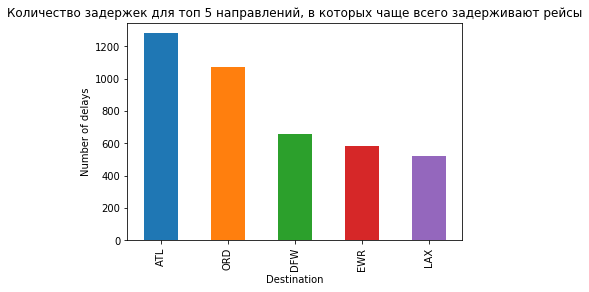

In [32]:
data.groupby("Dest").apply(lambda data: np.sum(data["dep_delayed_15min"] == "Y")).sort_values(ascending=False)[:5].plot(kind="bar")
plt.xlabel("Destination")
plt.ylabel("Number of delays")
plt.title('Количество задержек для топ 5 направлений, в которых чаще всего задерживают рейсы')
plt.show()

### Топ 10 самых хороших перевозчиков, которые реже всего задерживают свои рейсы ###

In [30]:
data.groupby("UniqueCarrier").apply(lambda data: np.sum(data["dep_delayed_15min"] == "Y")).sort_values(ascending=True)[:10]

UniqueCarrier
AQ     18
HA     33
TZ     64
DH    156
F9    156
HP    196
B6    393
YV    478
AS    541
FL    736
dtype: int64

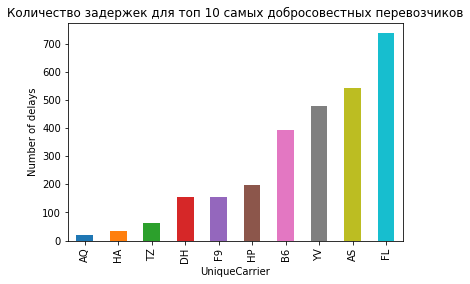

In [33]:
data.groupby("UniqueCarrier").apply(lambda data: np.sum(data["dep_delayed_15min"] == "Y")).sort_values(ascending=True)[:10].plot(kind='bar')
plt.xlabel("UniqueCarrier")
plt.ylabel("Number of delays")
plt.title('Количество задержек для топ 10 самых добросовестных перевозчиков')
plt.show()

### Tоп 10 самых безответственных аэропортов, в которых чаще всего происходят задержки ###

In [37]:
data.groupby("Origin").apply(lambda data: np.sum(data["dep_delayed_15min"] == "Y")).sort_values(ascending=False)[:10]

Origin
ATL    1506
ORD    1254
DFW     902
DEN     575
LAX     552
LAS     546
EWR     538
IAH     492
PHX     491
DTW     401
dtype: int64

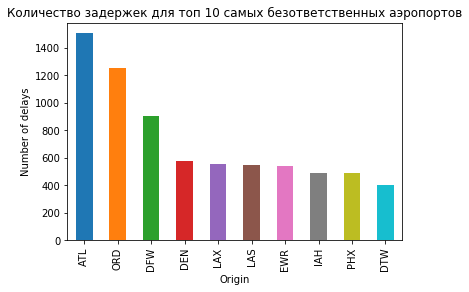

In [38]:
data.groupby("Origin").apply(lambda data: np.sum(data["dep_delayed_15min"] == "Y")).sort_values(ascending=False)[:10].plot(kind='bar')
plt.xlabel("Origin")
plt.ylabel("Number of delays")
plt.title('Количество задержек для топ 10 самых безответственных аэропортов')
plt.show()

### В каком сезоне самое большое количество задержек ###

In [102]:
month = []
a = 0
for i in range(100000):
        month.append(int(data['Month'].iloc[i][2:4]))
   
data['month'] = month

In [103]:
data.head()

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min,month
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N,8
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N,4
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N,9
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N,11
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y,10


In [111]:
s = data[data.dep_delayed_15min == 'Y'].groupby(['month'])['dep_delayed_15min'].count()

In [113]:
season = []
for i in range(1,12,3):
    season.append(s[i]+s[i+1]+s[i+2])
print(season)

[4531, 4486, 5135, 4892]


Text(0.5, 1.0, 'Количество задержек в зависимости сезона')

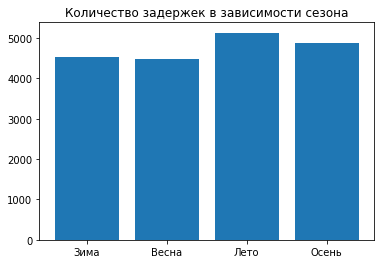

In [119]:
plt.bar(['Зима','Весна','Лето','Осень'], season)
plt.title('Количество задержек в зависимости сезона')